In [149]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#%matplotlib notebook

# Daten lesen

In [95]:
df_credit_data = pd.read_csv('data.csv')

# Dimensionen verstehen

In [96]:
nrows, ncols = df_credit_data.shape
df_credit_data.shape

(175862, 28)

In [97]:
df_credit_data.head()

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0


In [98]:
df_credit_data.describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
count,151344.000000,175178.000000,175862.000000,174951.000000,175020.000000,175166.000000,175166.000000
mean,140.596780,78158.378335,333.287771,1514.470783,1214.276243,29.182163,4749.017338
std,273.130096,16202.442285,1159.473567,792.348709,609.515566,29.027924,1878.994617
min,1.000000,57200.000000,1.000000,6.000000,3.000000,0.340000,1.000000
25%,58.000000,69000.000000,102.000000,967.000000,748.000000,7.760000,3444.000000
50%,90.000000,71300.000000,208.000000,1525.000000,1197.000000,17.200001,4554.000000
75%,141.000000,82700.000000,366.000000,2011.000000,1640.000000,39.320000,5892.000000
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000


# Problematische Daten
Erster Impuls: oh no! Daten über Geschlecht, Ethnie, Nationalität usw möchte ich eigentlich nicht berücksichtigen!
Strategie: 
1. hoffen, dass der Zusammenhang eh nur minimal ist => Spalten ignorieren
2. Solte der Zusammenhang sehr stark sein: mit Team / Vorgesetzten besrprechen, was rechtlich überhaupt in dem Fall erlaubt ist und inwiefern wir die Dimensionen nutzen wollen.

# Datentypen und missing values

ok, viele textspalten. ich werde get_dummies gebrauchen ;)

In [99]:
df_credit_data.dtypes

action_taken_name                  object
agency_name                        object
applicant_ethnicity_name           object
applicant_race_name_1              object
applicant_sex_name                 object
applicant_income_000s             float64
co_applicant_ethnicity_name        object
co_applicant_race_name_1           object
co_applicant_sex_name              object
county_name                        object
denial_reason_name_1               object
denial_reason_name_2               object
denial_reason_name_3               object
hoepa_status_name                  object
lien_status_name                   object
loan_purpose_name                  object
loan_type_name                     object
msamd_name                         object
owner_occupancy_name               object
preapproval_name                   object
property_type_name                 object
purchaser_type_name                object
hud_median_family_income          float64
loan_amount_000s                  

Datensatz insgesamt sehr vollständig bis auf denial_reasons und einkommen

In [100]:
round(df_credit_data.isna().sum() / nrows * 100, 2).sort_values(ascending=False)

denial_reason_name_3              99.48
denial_reason_name_2              97.36
denial_reason_name_1              86.88
applicant_income_000s             13.94
msamd_name                         8.33
number_of_1_to_4_family_units      0.52
number_of_owner_occupied_units     0.48
population                         0.40
minority_population                0.40
hud_median_family_income           0.39
county_name                        0.28
loan_amount_000s                   0.00
purchaser_type_name                0.00
property_type_name                 0.00
preapproval_name                   0.00
owner_occupancy_name               0.00
action_taken_name                  0.00
loan_type_name                     0.00
loan_purpose_name                  0.00
agency_name                        0.00
hoepa_status_name                  0.00
co_applicant_sex_name              0.00
co_applicant_race_name_1           0.00
co_applicant_ethnicity_name        0.00
applicant_sex_name                 0.00


In [101]:
df_credit_data.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

# Untersuchung einzelner Variablen

In [102]:
df_credit_data['msamd_name'].value_counts().head(8)

New York, Jersey City, White Plains - NY, NJ    64380
Nassau County, Suffolk County - NY              33487
Rochester - NY                                  14276
Buffalo, Cheektowaga, Niagara Falls - NY        12322
Albany, Schenectady, Troy - NY                  11813
Syracuse - NY                                    8067
Dutchess County, Putnam County - NY              4219
Utica, Rome - NY                                 3364
Name: msamd_name, dtype: int64

## Denial Reason 1, 2, 3 
könnte evtl intelligent zusammen gefasst / reformuliert werden zu 9 binären Vars

In [103]:
df_credit_data['denial_reason_name_1'].value_counts()

Debt-to-income ratio                              6402
Credit history                                    5544
Collateral                                        4524
Credit application incomplete                     2855
Other                                             2068
Unverifiable information                           804
Insufficient cash (downpayment, closing costs)     559
Employment history                                 260
Mortgage insurance denied                           51
Name: denial_reason_name_1, dtype: int64

In [104]:
df_credit_data['denial_reason_name_2'].value_counts()

Credit history                                    1115
Debt-to-income ratio                               935
Other                                              761
Collateral                                         537
Insufficient cash (downpayment, closing costs)     513
Unverifiable information                           332
Credit application incomplete                      228
Employment history                                 203
Mortgage insurance denied                           26
Name: denial_reason_name_2, dtype: int64

In [105]:
df_credit_data['denial_reason_name_3'].value_counts()

Other                                             271
Credit history                                    166
Debt-to-income ratio                              134
Insufficient cash (downpayment, closing costs)    117
Collateral                                        113
Unverifiable information                           64
Credit application incomplete                      34
Employment history                                 16
Mortgage insurance denied                           5
Name: denial_reason_name_3, dtype: int64

## kreditbezogene Variablen

In [106]:
df_credit_data['loan_purpose_name'].isna().sum()

0

In [107]:
df_credit_data['loan_purpose_name'].value_counts()

Home purchase       87947
Refinancing         69411
Home improvement    18504
Name: loan_purpose_name, dtype: int64

In [108]:
df_credit_data['loan_amount_000s'].value_counts().head(8)

10     1839
417    1820
100    1690
200    1548
300    1400
5      1337
50     1247
150    1235
Name: loan_amount_000s, dtype: int64

In [109]:
min(set(df_credit_data['loan_amount_000s']))

1

In [110]:
max(set(df_credit_data['loan_amount_000s']))

99999

In [111]:
df_credit_data['loan_type_name'].value_counts()

Conventional          134915
FHA-insured            32608
VA-guaranteed           6809
FSA/RHS-guaranteed      1530
Name: loan_type_name, dtype: int64

In [112]:
df_credit_data['hoepa_status_name'].value_counts()

Not a HOEPA loan    175835
HOEPA loan              27
Name: hoepa_status_name, dtype: int64

In [113]:
df_credit_data['lien_status_name'].value_counts()

Secured by a first lien          136068
Not applicable                    24682
Not secured by a lien              9442
Secured by a subordinate lien      5670
Name: lien_status_name, dtype: int64

In [114]:
df_credit_data['owner_occupancy_name'].value_counts()

Owner-occupied as a principal dwelling        156700
Not owner-occupied as a principal dwelling     16775
Not applicable                                  2387
Name: owner_occupancy_name, dtype: int64

In [115]:
df_credit_data['preapproval_name'].value_counts()

Not applicable                   145900
Preapproval was not requested     25744
Preapproval was requested          4218
Name: preapproval_name, dtype: int64

In [116]:
df_credit_data['property_type_name'].value_counts()

One-to-four family dwelling (other than manufactured housing)    170677
Manufactured housing                                               2932
Multifamily dwelling                                               2253
Name: property_type_name, dtype: int64

In [117]:
df_credit_data['purchaser_type_name'].value_counts()

Loan was not originated or was not sold in calendar year covered by register    102132
Fannie Mae (FNMA)                                                                20170
Ginnie Mae (GNMA)                                                                15995
Freddie Mac (FHLMC)                                                              14789
Commercial bank, savings bank or savings association                              7955
Life insurance company, credit union, mortgage bank, or finance company           6144
Other type of purchaser                                                           4529
Affiliate institution                                                             3471
Private securitization                                                             674
Farmer Mac (FAMC)                                                                    3
Name: purchaser_type_name, dtype: int64

## Einkommensverteilung
zwischen 1k und 10Mio

In [118]:
df_credit_data['applicant_income_000s'].isna().sum()

24518

In [119]:
df_credit_data['applicant_income_000s'].min(), df_credit_data['applicant_income_000s'].max()

(1.0, 9999.0)

ok, halbwegs gauss... 
peaks bei 5er Schritten: erwartbar

<AxesSubplot:>

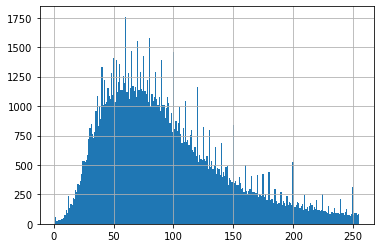

In [120]:
df_credit_data[df_credit_data['applicant_income_000s']<256]['applicant_income_000s'].hist(bins=255)

look at this long tail! ;);)

<AxesSubplot:>

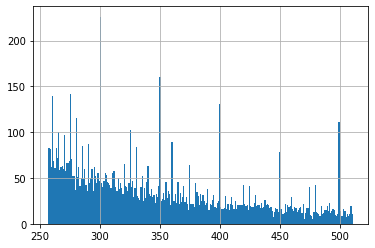

In [121]:
df_credit_data[(df_credit_data['applicant_income_000s']>256) & (df_credit_data['applicant_income_000s']< 512)]['applicant_income_000s'].hist(bins=255)

<AxesSubplot:>

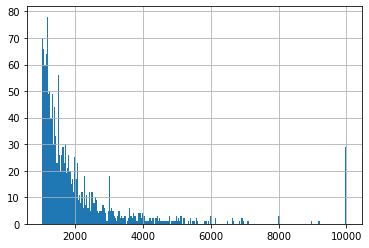

In [122]:
df_credit_data[df_credit_data['applicant_income_000s']>1024]['applicant_income_000s'].hist(bins=255)

In [123]:
# due to time constraints no sep env and requirements @TODO: create env and requirements
# ! pip3 install ipympl 
# index, values = df_credit_data['applicant_income_000s'].value_counts()[:10].index, df_credit_data['applicant_income_000s'].value_counts()[:10].values
# %matplotlib widget
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(index, values)
# plt.bar(index, values)

## hud_median_family_income
liegt zwischen 57k und 109k

In [124]:
df_credit_data['hud_median_family_income'].min(), df_credit_data['hud_median_family_income'].max()

(57200.0, 109000.0)

<AxesSubplot:>

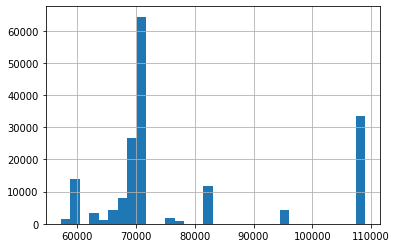

In [125]:
df_credit_data['hud_median_family_income'].hist(bins = 32)

In [126]:
df_credit_data['hud_median_family_income'].isna().sum()

684

## Höhe des Kredites

In [127]:
df_credit_data['loan_amount_000s'].min(), df_credit_data['loan_amount_000s'].max()

(1, 99999)

<AxesSubplot:>

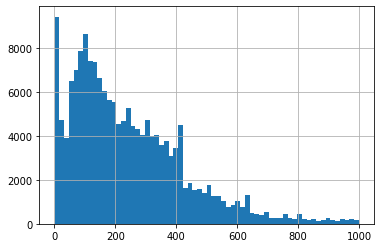

In [128]:
df_credit_data[df_credit_data['loan_amount_000s']< 1000]['loan_amount_000s'].hist(bins = 64)

In [129]:
df_credit_data['loan_amount_000s'].isna().sum()

0

## number_of_1_to_4_family_units

<AxesSubplot:>

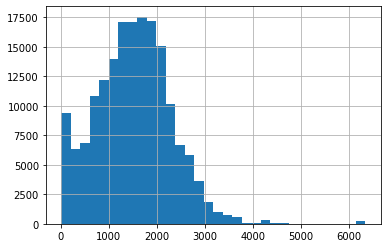

In [130]:
df_credit_data['number_of_1_to_4_family_units'].hist(bins=32)

In [131]:
df_credit_data['number_of_1_to_4_family_units'].isna().sum()

911

## msamd

In [132]:
df_credit_data['msamd_name'].value_counts().head(8)

New York, Jersey City, White Plains - NY, NJ    64380
Nassau County, Suffolk County - NY              33487
Rochester - NY                                  14276
Buffalo, Cheektowaga, Niagara Falls - NY        12322
Albany, Schenectady, Troy - NY                  11813
Syracuse - NY                                    8067
Dutchess County, Putnam County - NY              4219
Utica, Rome - NY                                 3364
Name: msamd_name, dtype: int64

In [133]:
df_credit_data['msamd_name'].isna().sum()

14642

## number_of_owner_occupied_units

<AxesSubplot:>

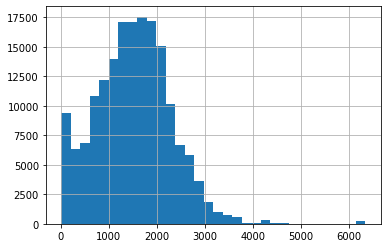

In [134]:
df_credit_data['number_of_1_to_4_family_units'].hist(bins=32)

In [135]:
df_credit_data['number_of_owner_occupied_units'].isna().sum()

842

## minority_population

<AxesSubplot:>

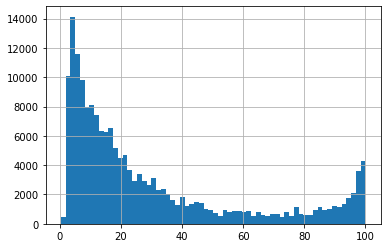

In [136]:
df_credit_data['minority_population'].hist(bins=64)

In [137]:
df_credit_data['minority_population'].isna().sum()

696

## population

<AxesSubplot:>

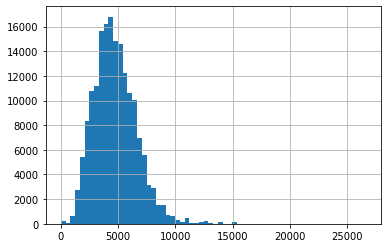

In [138]:
df_credit_data['population'].hist(bins=64)

# Zusammenfassung einzelne Variablen
## Dimensionen teilen sich auf, in 
### 0. nicht 100 inhaltlich klar
loan_type_name - Versicherung (des Kredits?) e.g. "FHA-insured" = Federal Housing Administration => sollte inhaltlich geklärt und in Runde 2 mal getestet werden
hoepa_status_name - 175k mal HOEPA, nur 27 mal nicht => kann ignoriert werden  
** lien_status_name - Pfand / Bürge? 136k mal "first lien", 24k mal Not Applicable, 9k mal "not secured by a lien" => könnte interessant sein

### 1. "sehr problematische" persönliche merkmale: 
applicant_ethnicity_name, applicant_race_name_1, applicant_sex_name,  
co_applicant_ethnicity_name, co_applicant_race_name_1, co_applicant_sex_name, 

### 2. "weniger problematische" kontext-Merkmale: 
county_name  
msamd_name - unklar, wofür msamd steht, aber sind ortsbezeichnungen (e.g. NY, Buffalo etc)  
number_of_1_to_4_family_units - zwischen 0 und 3k, gaussig, nur 900 fehlen   
number_of_owner_occupied_units - zwischen 0 und 3k, long Tail nur 900 fehlen  
** minority_population - bimodal, zwei deutliche Peaks bei 0 und 100, 700 fehlen. Natürlich problematisch aber wegen Verteilung sehr interessant 
population - Gauss um die 500  
** hud_median_family_income - nur ca 600 fehlend, untypische Verteilung zwischen 50 und 109k

### 3. prozessbezogene Merkmale:
agency_name - Welche Behörde / Büro? 6 fairly balanced values  
preapproval_name - wurde vorprüfung angefragt? 150k mal "not applicable" => sehr unbalanciert, eher nicht nehmen  
purchaser_type_name - z.B. "Fannie Mae", Lebensversicherung, Affiliate. Nur ca 1/3 vorhanden. Dennoch potentiell interessant.  

### 4. Immobilienbezogene Merkmale:
owner_occupancy_name - hauptwohnsitz oder nicht? unbalanciert (160k vs 16k)  
property_type_name - Multifamily, Manufactured oder 1-4 Family. 171k mal "One-to-four family dwelling"  => unbalanciert

### 5. intuitiv hauptkriterien: Kredithöhe und Einkommen des Antragsstellers
** loan_amount_000s - gefragte Summe. meist zwischen 5 und 500k. muss noch intelligent bucketisiert werden, (outlier!)  , , keine NAs  
** loan_purpose_name - Hauskauf, Hausrenovierung, Refinanzierung  , keine NAs
** applicant_income_000s - schräge Gauss um die 60k mit langem long tail, hat 14% missing values

### 6. Zielvariable(n)
action_taken_name (Zielvariable?)  
** denial_reason_name_1, denial_reason_name_2, denial_reason_name_3 => meistens nicht vorhanden, selbe Menge von 9 Kriterien  


### 7. Welche Variablen Fehlen mir?
Zeitpunkt des Abschlusses
- Jahr / Monat => Entwicklung des Trends (Beispielsweise: Inflation / Rezession usw)
- Monat / Woche / Wochentag => Saisonale Entwicklungen (Beispielsweise "Nach Weihnachten haben die Leute weniger Cash und investieren defensiver")
- Tageszeit => Cirkadische Effekte (Beispielsweise "Abends sind die Kunden Abschlussfreudiger")

## Zielvariable

In [139]:
df_credit_data['action_taken_name'].value_counts().isna().sum()

0

In [140]:
df_credit_data['action_taken_name'].value_counts()

Loan originated                                        90982
Application denied by financial institution            32005
Loan purchased by the institution                      24682
Application withdrawn by applicant                     15765
File closed for incompleteness                          6682
Application approved but not accepted                   5743
Preapproval request denied by financial institution        3
Name: action_taken_name, dtype: int64

# Feature selection
var 1: manual / by intuition / information (for baseline model)  
var 2: RFE (recursive Feature Elimination) https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html  
var 3: sklearn.feature_selection.SelectKBest  
uswusw

# prepare minimal dataset

## select features

In [197]:
df_with_dummies = pd.get_dummies(df_credit_data, columns=['applicant_sex_name', 'applicant_ethnicity_name', 'applicant_race_name_1', 'loan_purpose_name'])# loan_purpose_name
df_with_dummies.head(2)

,action_taken_name,agency_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,...,applicant_race_name_1_American Indian or Alaska Native,applicant_race_name_1_Asian,applicant_race_name_1_Black or African American,"applicant_race_name_1_Information not provided by applicant in mail, Internet, or telephone application",applicant_race_name_1_Native Hawaiian or Other Pacific Islander,applicant_race_name_1_Not applicable,applicant_race_name_1_White,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing
0,Application denied by financial institution,Consumer Financial Protection Bureau,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,Collateral,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
1,Application withdrawn by applicant,Department of Housing and Urban Development,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0


In [198]:
df_with_dummies.columns

Index(['action_taken_name', 'agency_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'applicant_sex_name_Female',
       'applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_sex_name_Male', 'applicant_sex_name_Not applicable',
       'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'a

In [208]:
selected_features = ['action_taken_name', 'applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income']
selected_features = selected_features + ['applicant_sex_name_Female',
       #'applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_sex_name_Male', 
      #'applicant_sex_name_Not applicable',
       'applicant_ethnicity_name_Hispanic or Latino',
       #'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_ethnicity_name_Not Hispanic or Latino',
       #'applicant_ethnicity_name_Not applicable',
       'applicant_race_name_1_American Indian or Alaska Native',
       'applicant_race_name_1_Asian',
       'applicant_race_name_1_Black or African American',
       #'applicant_race_name_1_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_race_name_1_Native Hawaiian or Other Pacific Islander',
       'applicant_race_name_1_Not applicable', 'applicant_race_name_1_White',
       'loan_purpose_name_Home improvement', 'loan_purpose_name_Home purchase',
       'loan_purpose_name_Refinancing']


In [209]:
df_credit_data_selected = df_with_dummies[selected_features]
df_credit_data_selected.shape

(175862, 19)

In [210]:
df_credit_data_selected.isna().sum()

action_taken_name                                                      0
applicant_income_000s                                              24518
loan_amount_000s                                                       0
hud_median_family_income                                             684
applicant_sex_name_Female                                              0
applicant_sex_name_Male                                                0
applicant_sex_name_Not applicable                                      0
applicant_ethnicity_name_Hispanic or Latino                            0
applicant_ethnicity_name_Not Hispanic or Latino                        0
applicant_ethnicity_name_Not applicable                                0
applicant_race_name_1_American Indian or Alaska Native                 0
applicant_race_name_1_Asian                                            0
applicant_race_name_1_Black or African American                        0
applicant_race_name_1_Native Hawaiian or Other Paci

## deal with missing values
ofc there are alternatives: fill with mean / use own model to fill etc

In [211]:
df_credit_data_selected = df_credit_data_selected.dropna(axis= 0)
df_credit_data_selected.shape

(150750, 19)

In [212]:
X, y = df_credit_data_selected['action_taken_name'], df_credit_data_selected.drop(['action_taken_name'], axis=1)

## train / test split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(df_credit_data_selected, y, test_size=0.10, random_state=42)

# Correlation

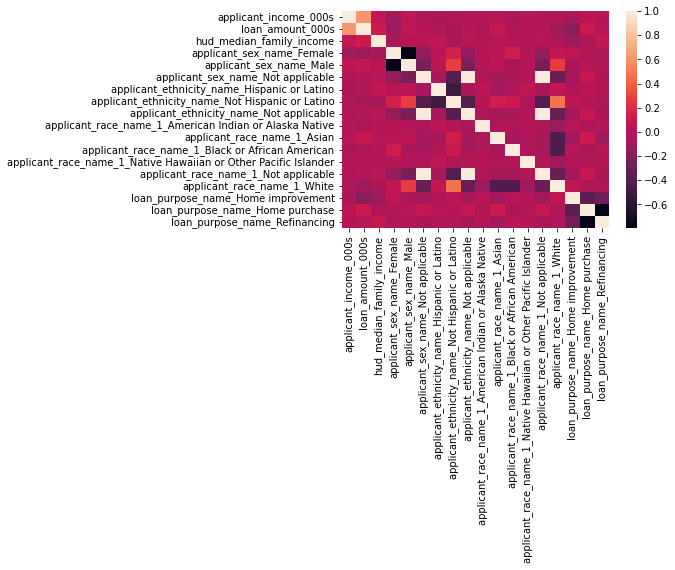

In [214]:
# gender: no big correlation ;)
sns.heatmap(X_train.corr())
plt.savefig('pics/heatmap_ethnicity.png')

# Baseline Model
Einfach das einfachste Modell auf die einfachste Datenmenge anwenden, um ein Baseline zu haben